<a href="https://www.kaggle.com/code/marioayad/california-housing-price-prediction?scriptVersionId=127708986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

# Reading data

In [2]:
df = pd.read_csv("../input/california-housing-dataset/housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

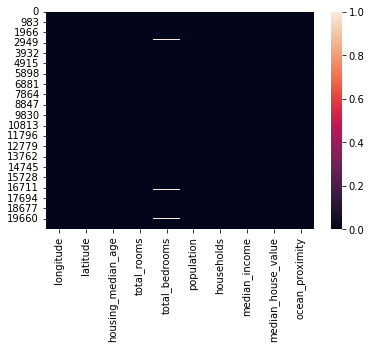

In [6]:
sns.heatmap(df.isnull())

# Data Preprocessing

# Missing Data

In [7]:
df.dropna(subset=['total_bedrooms'], inplace=True)
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<AxesSubplot:>

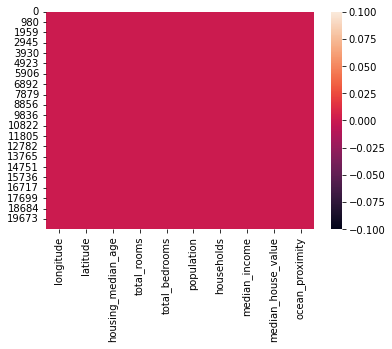

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


There is no duplicates

# Encoding

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


ocean_proximity needs encoding

In [13]:
le = LabelEncoder()

In [14]:
ocean_proximity_le = LabelEncoder()


In [15]:
df['ocean_proximity'] = ocean_proximity_le.fit_transform(df['ocean_proximity'])


In [16]:
ocean_proximity_le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

<1H OCEAN = 0, INLAND = 1, ISLAND = 2, NEAR BAY = 3, NEAR OCEAN = 4

In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


# Detecting Outliers

In [19]:
df.shape

(20433, 10)

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_bedrooms'>

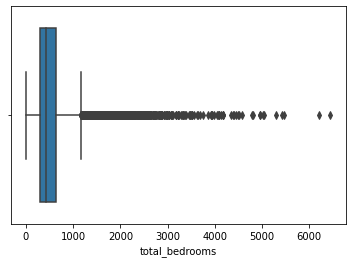

In [21]:
sns.boxplot(df['total_bedrooms'])

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

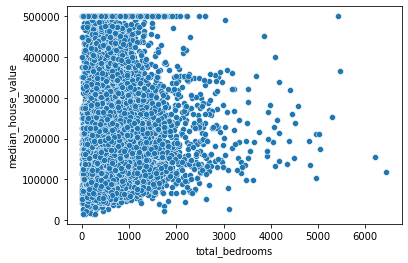

In [22]:
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_rooms'>

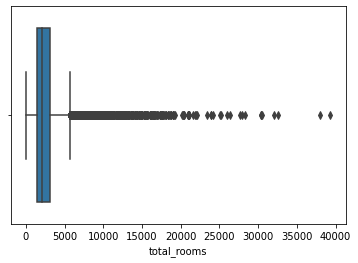

In [23]:
sns.boxplot(df['total_rooms'])

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

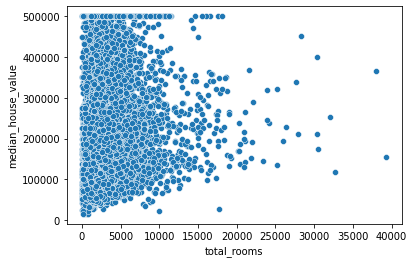

In [24]:
sns.scatterplot(x='total_rooms', y='median_house_value', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

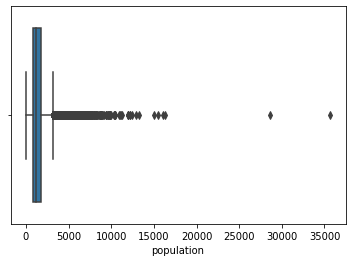

In [25]:
sns.boxplot(df['population'])

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

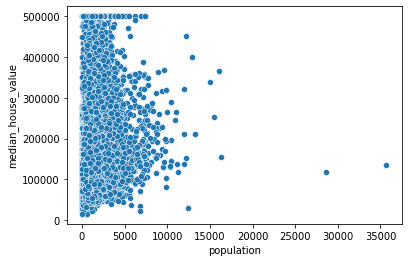

In [26]:
sns.scatterplot(x='population', y='median_house_value', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='households'>

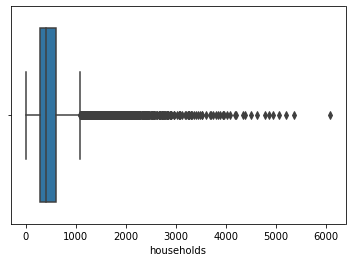

In [27]:
sns.boxplot(df['households'])

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

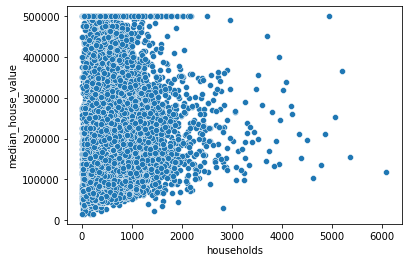

In [28]:
sns.scatterplot(x='households', y='median_house_value', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='median_income'>

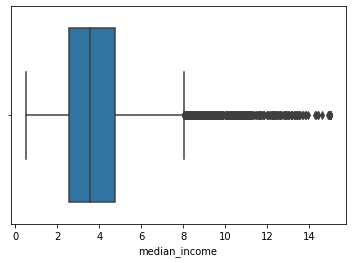

In [29]:
sns.boxplot(df['median_income'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

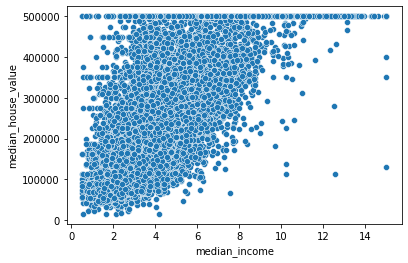

In [30]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)

In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# Removing Outliers

In [32]:
def outliers(x, y, z):
    filter = x.index[ (x[y] >= z) ]
    x[y] = x[y].drop(filter)
    return x



In [33]:
outliers(df, 'total_bedrooms', 4000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [34]:
df.dropna(subset=['total_bedrooms'], inplace=True)

In [35]:
outliers(df, 'total_rooms',20000 )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [36]:
df.dropna(subset=['total_rooms'], inplace=True)

In [37]:
outliers(df, 'population',7000 )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [38]:
df.dropna(subset=['population'], inplace=True)

In [39]:
outliers(df, 'households',2000 )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [40]:
df.dropna(subset=['households'], inplace=True)

In [41]:
outliers(df, 'median_income',10 )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [42]:
df.dropna(subset=['median_income'], inplace=True)

In [43]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# Modelling phase

<AxesSubplot:>

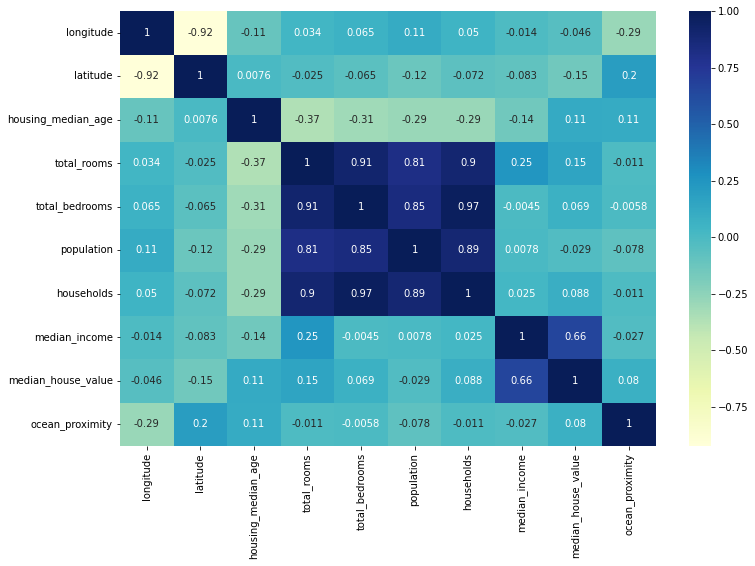

In [44]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

 # Split data

In [45]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
df = df[['housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity']]

In [47]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [48]:
x = df.drop(['median_house_value'] , axis = 1).values
x

array([[4.1000e+01, 8.8000e+02, 1.2900e+02, ..., 1.2600e+02, 8.3252e+00,
        3.0000e+00],
       [2.1000e+01, 7.0990e+03, 1.1060e+03, ..., 1.1380e+03, 8.3014e+00,
        3.0000e+00],
       [5.2000e+01, 1.4670e+03, 1.9000e+02, ..., 1.7700e+02, 7.2574e+00,
        3.0000e+00],
       ...,
       [1.7000e+01, 2.2540e+03, 4.8500e+02, ..., 4.3300e+02, 1.7000e+00,
        1.0000e+00],
       [1.8000e+01, 1.8600e+03, 4.0900e+02, ..., 3.4900e+02, 1.8672e+00,
        1.0000e+00],
       [1.6000e+01, 2.7850e+03, 6.1600e+02, ..., 5.3000e+02, 2.3886e+00,
        1.0000e+00]])

In [49]:
y = df['median_house_value'].values
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

# Train test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 42)

In [52]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(14937, 7) (4980, 7) (14937,) (4980,)


# Data Scaling using Robust Regression

In [53]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear Regression Model

In [54]:
reg = linear_model.LinearRegression()

In [55]:
reg.fit(x_train , y_train)

LinearRegression()

In [56]:
reg.score(x_train , y_train)

0.5656595401887705

In [57]:
reg.score(x_test , y_test)

0.5803379978576695

In [58]:
reg.intercept_

187403.95598308698

In [59]:
reg.coef_

array([ 35860.84899254, -56579.05253338,  58632.12293872, -40307.5496393 ,
        47194.81781138, 117564.06385291,   3924.5515539 ])

In [60]:
pd.DataFrame(reg.coef_ , df.columns[:-1] , columns=['Coeficient'])

,Coeficient
housing_median_age,35860.848993
total_rooms,-56579.052533
total_bedrooms,58632.122939
population,-40307.549639
households,47194.817811
median_income,117564.063853
median_house_value,3924.551554


In [61]:
y_pred = reg.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df2.head(10)

,Y_test,Y_pred
0,73500.0,99303.779346
1,222100.0,310243.959650
2,86900.0,96333.327989
3,67500.0,54120.826920
4,90800.0,225667.210646
5,205900.0,193452.465626
6,146900.0,200081.687553
7,54300.0,128116.210227
8,231800.0,254118.539274
9,220000.0,234575.145345


In [62]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.5803379978576695

In [63]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.5801412241946649

In [64]:
adj_R2> reg_score

False

In [65]:
mse = mean_squared_error(y_test , y_pred)
mse

5199804125.89357

In [66]:
mae = mean_absolute_error(y_test , y_pred)
mae

53985.54258164227

In [67]:
mpae = mean_absolute_percentage_error(y_test , y_pred)
mpae

0.337759070145393

In [68]:
reg_mse = mean_squared_error(y_test , y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

72109.66735392399

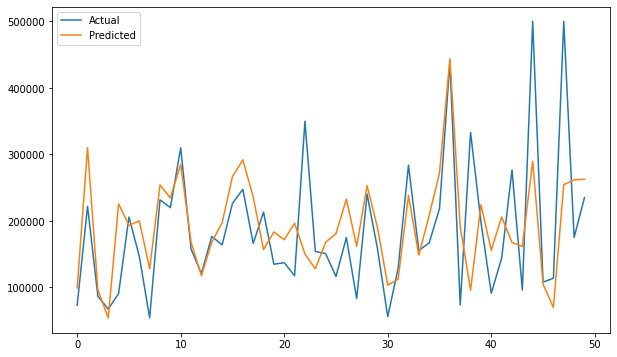

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df2[:50])
plt.legend(['Actual' , 'Predicted'])

## Ridge Regression

In [70]:
rid = linear_model.Ridge(alpha=0.4)


In [71]:
rid.fit(x_train , y_train)


Ridge(alpha=0.4)

In [72]:
rid.score(x_train , y_train)


0.5656595257292728

In [73]:
rid.score(x_test , y_test)


0.5803347435981454

In [74]:
rid.intercept_


187405.7974563387

In [75]:
rid.coef_
pd.DataFrame(rid.coef_ , df.columns[:-1] , columns=['Coeficient'])


,Coeficient
housing_median_age,35859.200322
total_rooms,-56543.425574
total_bedrooms,58592.387681
population,-40303.014658
households,47194.799237
median_income,117546.552057
median_house_value,3924.593221


In [76]:
y_pred2 = rid.predict(x_test)
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred2})
df3.head(10)

,Y_test,Y_pred2
0,73500.0,99314.451127
1,222100.0,310233.871953
2,86900.0,96349.575180
3,67500.0,54141.682323
4,90800.0,225664.608224
5,205900.0,193445.218413
6,146900.0,200086.520842
7,54300.0,128123.691522
8,231800.0,254110.527126
9,220000.0,234571.751083


In [77]:
rid_score = r2_score(y_test , y_pred2)
rid_score



0.5803347435981454

In [78]:
rid_mse = mean_squared_error(y_test , y_pred2)
rid_rmse = np.sqrt(rid_mse)
rid_rmse

72109.946939776

In [79]:
rid_mse

5199844447.65731

In [80]:
mpae2 = mean_absolute_percentage_error(y_test , y_pred2)
mpae2

0.33776993166225566

In [81]:
mae2 = mean_absolute_error(y_test , y_pred2)
mae2

53986.14708909257

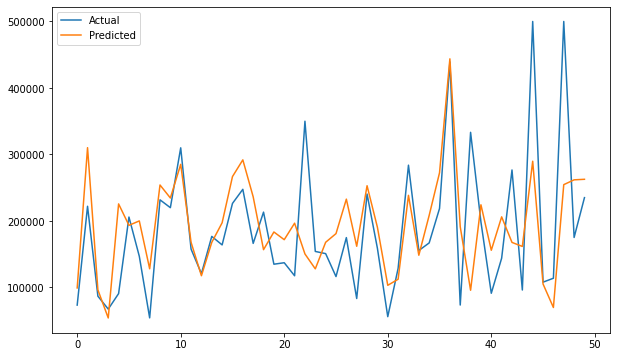

In [82]:
plt.figure(figsize=(10,6))
plt.plot(df3[:50])
plt.legend(['Actual' , 'Predicted'])

# Lasso Regression

In [83]:
las = linear_model.Lasso(alpha=0.9)


In [84]:
las.fit(x_train , y_train)


Lasso(alpha=0.9)

In [85]:
las.score(x_train , y_train)



0.5656595362876979

In [86]:
las.score(x_test , y_test)

0.5803370810134997

In [87]:
las.intercept_


187404.67335288806

In [88]:
las.coef_
pd.DataFrame(las.coef_ , df.columns[:-1] , columns=['Coeficient'])

,Coeficient
housing_median_age,35859.415594
total_rooms,-56562.364015
total_bedrooms,58617.756574
population,-40301.693697
households,47186.729631
median_income,117556.968533
median_house_value,3924.351571


In [89]:
y_pred3 = las.predict(x_test)
df4 = pd.DataFrame({"Y_test": y_test , "Y_pred3" : y_pred3})
df4.head(10)

,Y_test,Y_pred3
0,73500.0,99307.570596
1,222100.0,310239.171189
2,86900.0,96341.938031
3,67500.0,54128.992271
4,90800.0,225667.819768
5,205900.0,193448.816956
6,146900.0,200083.856909
7,54300.0,128118.580385
8,231800.0,254116.524010
9,220000.0,234572.701664


In [90]:
las_score = r2_score(y_test , y_pred3)
las_score

0.5803370810134997

In [91]:
las_mse = mean_squared_error(y_test , y_pred3)
las_rmse = np.sqrt(las_mse)
las_rmse

72109.74612361442

In [92]:
las_mse

5199815486.012125

In [93]:
mae3 = mean_absolute_error(y_test , y_pred3)
mae3

53985.73958648856

In [94]:
mpae3 = mean_absolute_percentage_error(y_test , y_pred3)
mpae3

0.3377627861968018

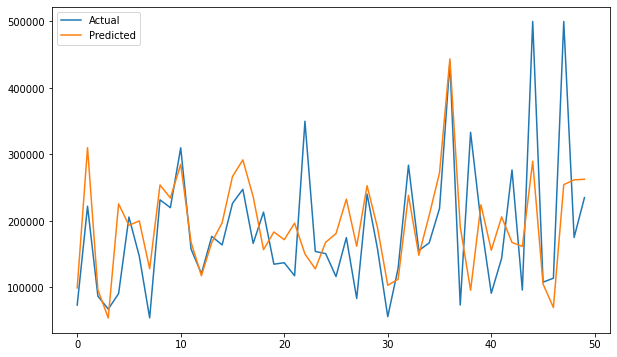

In [95]:
plt.figure(figsize=(10,6))
plt.plot(df4[:50])
plt.legend(['Actual' , 'Predicted'])

# Models Comparison

In [96]:
models = ['LinearRegression' , 'Ridge' , 'Lasso']
data = [[reg_score , mpae], [rid_score , mpae2],[las_score , mpae3]]
cols = ['r2_score' , 'MPAE']
pd.DataFrame(data=data , index = models , columns = cols).sort_values(ascending=False , by = ['r2_score'])

,r2_score,MPAE
LinearRegression,0.580338,0.337759
Lasso,0.580337,0.337763
Ridge,0.580335,0.337770


In [97]:
X2 = sm.add_constant(x)
est = sm.OLS(y , X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3763.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:28:07   Log-Likelihood:            -2.5125e+05
No. Observations:               19917   AIC:                         5.025e+05
Df Residuals:                   19909   BIC:                         5.026e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.11e+04   2445.260    -33.168      0.0

In [98]:
X3 = sm.add_constant(x)
est3 = sm.GLM(y , X3)
est4 = est3.fit()
print(est4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19909
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                      5.3084e+09
Method:                          IRLS   Log-Likelihood:            -2.5125e+05
Date:                Sat, 29 Apr 2023   Deviance:                   1.0568e+14
Time:                        16:28:07   Pearson chi2:                 1.06e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7335
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.11e+04   2445.260    -33.168      0.0

# Random Forest Model

In [99]:
rand = RandomForestRegressor()

In [100]:
rand.fit(x_train , y_train)

RandomForestRegressor()

In [101]:
rand.score(x_train , y_train)

0.9553761466479797

In [102]:
rand.score(x_test , y_test)

0.6850746066845164

In [103]:
y_pred4 = rand.predict(x_test)
df5 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred4})
df5.head(10)


,Y_test,Y_pred
0,73500.0,101224.00
1,222100.0,375876.14
2,86900.0,99737.00
3,67500.0,87007.00
4,90800.0,155115.00
5,205900.0,202678.01
6,146900.0,197273.00
7,54300.0,65208.00
8,231800.0,245199.02
9,220000.0,276685.01


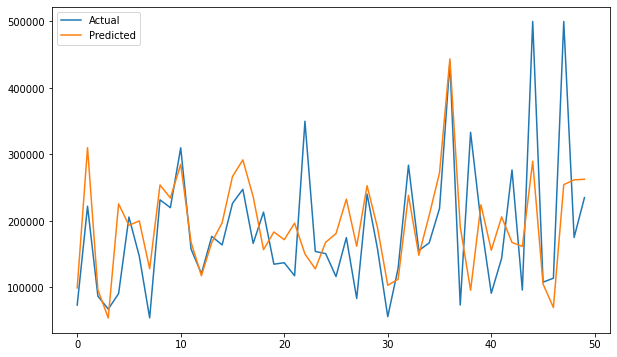

In [104]:
plt.figure(figsize=(10,6))
plt.plot(df4[:50])
plt.legend(['Actual' , 'Predicted'])

Random forest model gives better result than linear regression model, so the problem wasn't in the data preprocessing phase and because the data is non linear

# VIF Multicollinearity

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

In [105]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [106]:
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)


              feature        VIF
0  housing_median_age   4.453538
1         total_rooms  32.221510
2      total_bedrooms  80.899133
3          population  18.418866
4          households  84.740507
5       median_income  12.898269
6  median_house_value   9.520867
7     ocean_proximity   1.706778


total_rooms, total_bedrooms, populaton, households, median_income, they all have high multicollinearity, since VIF is greater than 10